In [118]:
#This code was created by Multronica Solutions
#15 October 2022

#importing libraries
import cv2 #opencv
import numpy as np
import matplotlib.pyplot as plt

In [119]:

#file path
file='images\multan.jpg'

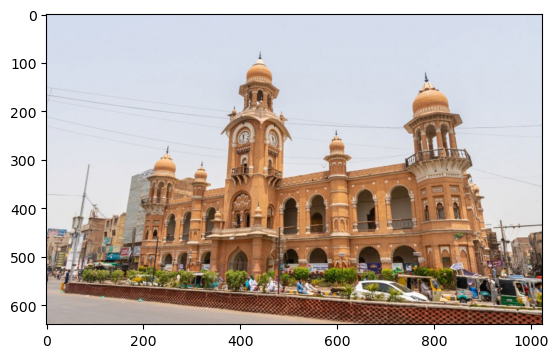

In [120]:
#load the image

image=cv2.imread(file)
#convert the image to RGB space
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#Display the image
plt.figure()
plt.imshow(image)
plt.show()

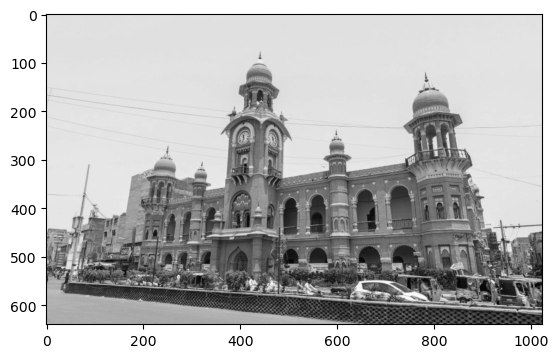

In [121]:
#Step 1: Convert to Grayscale
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(gray_image,cmap='gray')
plt.show()

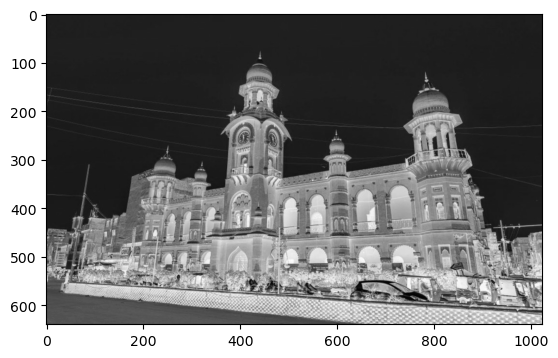

In [122]:
#Step 2: Invert the Image

invert_image=np.invert(gray_image)

plt.figure()
plt.imshow(invert_image,cmap='gray')
plt.show()

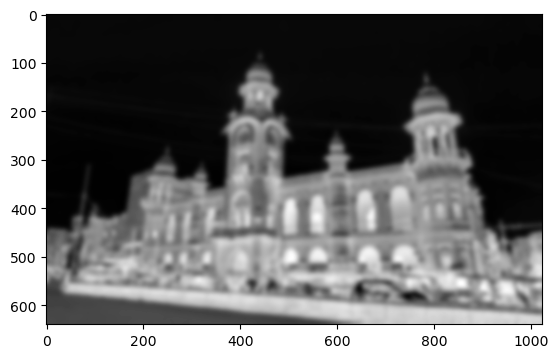

In [123]:
#Step 3: Blur the image with Gaussian kernel
image_blur=cv2.GaussianBlur(invert_image,(31,31),0)

plt.figure()
plt.imshow(image_blur,cmap='gray')
plt.show()

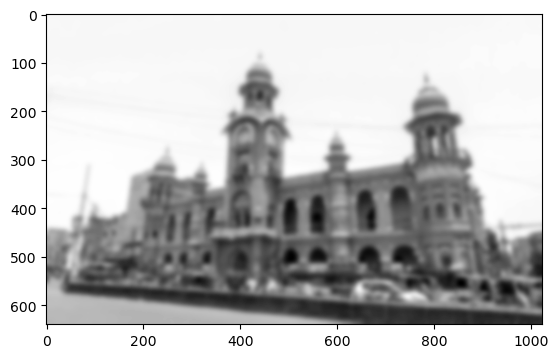

In [124]:
#Step 4: Invert it back
invert_blur=np.invert(image_blur)

plt.figure()
plt.imshow(invert_blur,cmap='gray')
plt.show()

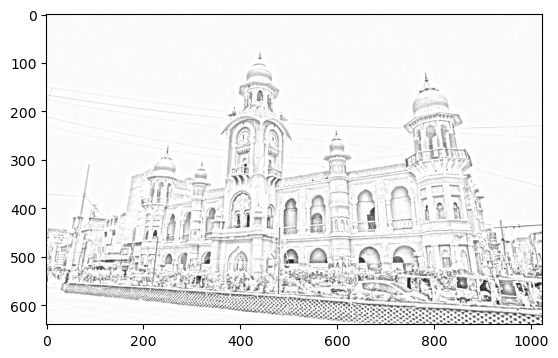

In [125]:
#Step 5: Divide both matrices.
#scale factor can be changed (250-256 is a good range)
divide=cv2.divide(gray_image,invert_blur,scale=250.0)

plt.figure()
plt.imshow(divide,cmap='gray')
plt.show()

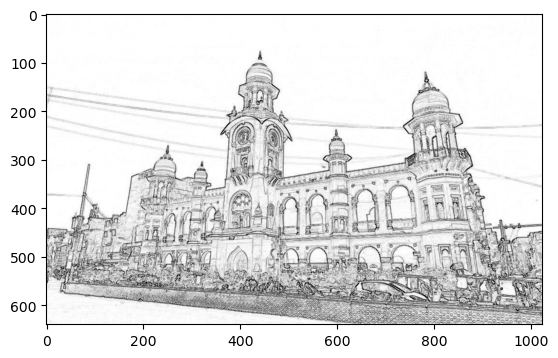

In [126]:
#Step 6: Calculating overall gradient of image with Sobel Filters

#Gradient in x direction 
gradient_x=cv2.Sobel(gray_image, ddepth=cv2.CV_32F,dx=1,dy=0)
#Gradient in y direction 
gradient_y=cv2.Sobel(gray_image, ddepth=cv2.CV_32F,dx=0,dy=1)

#Finding the absolute values
gradient_x=cv2.convertScaleAbs(gradient_x)
gradient_y=cv2.convertScaleAbs(gradient_y)

#Calculating overall gradient
#Use weighted addition
gradient=cv2.addWeighted(gradient_x,0.5,gradient_y,0.5,0)
#Invert the overall gradient image
gradient=np.invert(gradient)

plt.figure()
plt.imshow(gradient,cmap='gray')
plt.show()

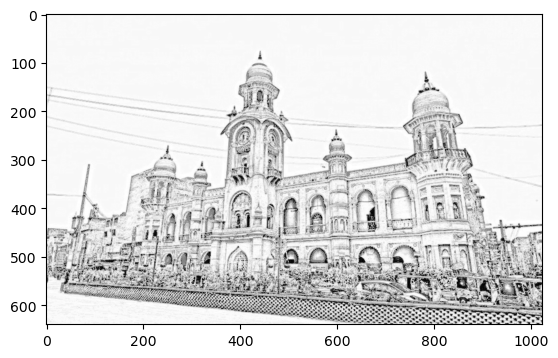

In [128]:
#Step 7: Image Blending and Bitwise And operation

alpha=0.5 #influence -> gradient on the output
#image blending calculation
final_image=alpha*gradient+(1-alpha)*divide 
#Bitwise and operation with final_image (integer values) and divide matrix
final_image=np.bitwise_and(final_image.astype(int),divide)

plt.figure()
plt.imshow(final_image,cmap='gray')
plt.show()

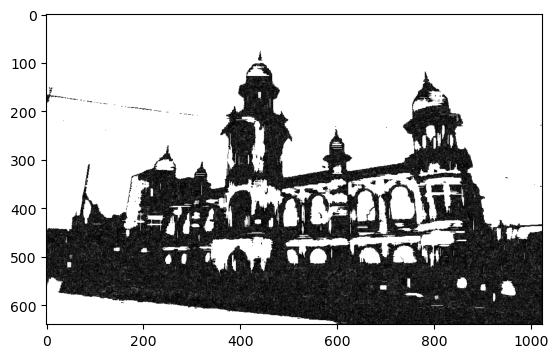

In [131]:
#Optional: Demo of OpenCV's pencilSketch method
#Change sigma_s, sigma_r and shade_factor

gray,image=cv2.pencilSketch(image,sigma_s=90,sigma_r=0.1,shade_factor=0.05)


plt.figure()
plt.imshow(gray,cmap='gray')
plt.show()